# Getting the returns of indexes

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [3]:
tickers = ["^GSPC","^FTSE", "DAX", "^FCHI", "^IBEX", "^SSMI", "FTSEMIB.MI", "PSI20.LS", "^AEX"]

In [4]:
tickers_europe=["^FTSE", "DAX", "^FCHI", "^IBEX", "^SSMI", "FTSEMIB.MI", "PSI20.LS", "^AEX"]

In [7]:
indexes = yf.download(tickers, "2012-01-01", "2021-12-31")

[*********************100%***********************]  9 of 9 completed


In [8]:
europe_stoxx = yf.download("^STOXX", "2012-01-01", "2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [9]:
europe_stoxx_close = europe_stoxx['Close']

In [10]:
indexes_close = indexes['Close']

In [5]:
european_returns = pd.read_csv('/home/dum/Desktop/data/european_market_returns.csv', index_col = "Date")
american_returns = pd.read_csv('/home/dum/Desktop/data/sp_500_returns.csv', index_col = "Date")

In [13]:
european_returns_flatten = european_returns.to_numpy().flatten()
american_returns_flatten = american_returns.to_numpy().flatten()

## Densidades

<function matplotlib.pyplot.show(close=None, block=None)>

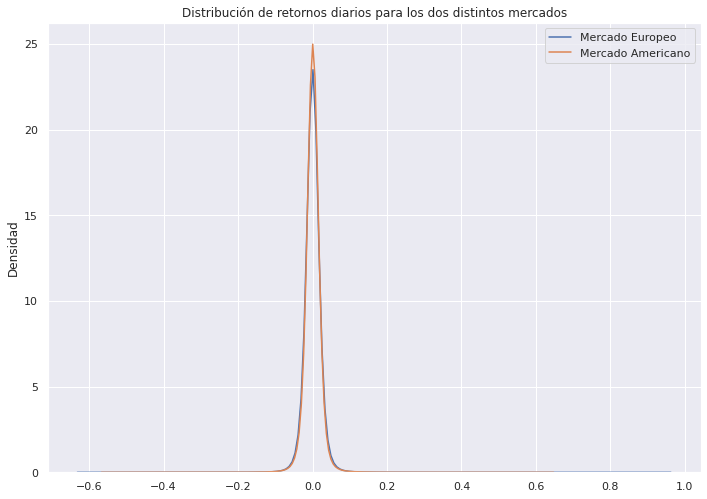

In [20]:
ax = sns.kdeplot(european_returns_flatten, bw_method=0.5, fill=False, alpha = 1)
ax = sns.kdeplot(american_returns_flatten, bw_method=0.5, fill=False, alpha = 1)
plt.legend(labels=['Mercado Europeo', 'Mercado Americano'])    
plt.title("Distribución de retornos diarios para los dos distintos mercados")
ax.set(ylabel="Densidad")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

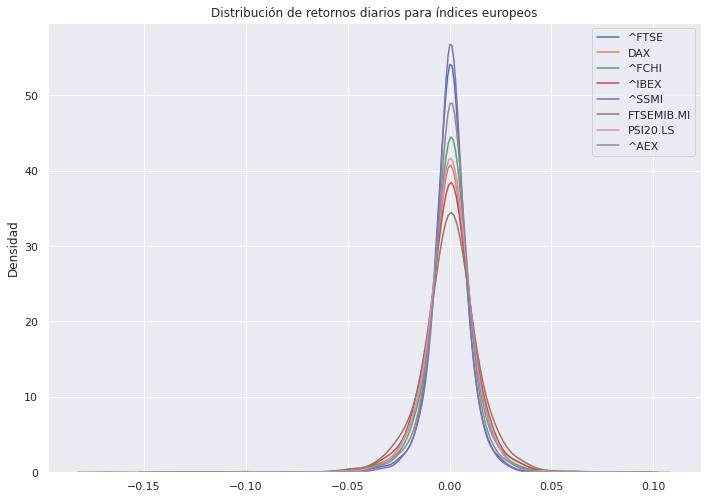

In [15]:
for index in tickers_europe:
    ax = sns.kdeplot(indexes_close[index].pct_change(periods = 1).dropna().values, bw_method=0.3, fill=False, alpha = 1)
plt.legend(labels=tickers_europe)    
plt.title("Distribución de retornos diarios para índices europeos")
ax.set(ylabel="Densidad")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

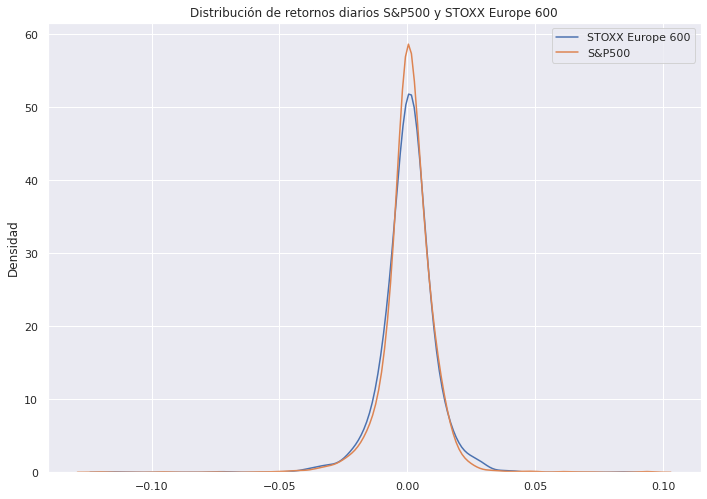

In [16]:
ax = sns.kdeplot(europe_stoxx_close.pct_change(periods = 1).dropna().values, bw_method=0.3, fill=False, alpha = 1)
ax = sns.kdeplot(indexes_close["^GSPC"].pct_change(periods = 1).dropna().values, bw_method=0.3, fill=False, alpha = 1)
plt.legend(labels=["STOXX Europe 600", "S&P500"])    
plt.title("Distribución de retornos diarios S&P500 y STOXX Europe 600")
ax.set(ylabel="Densidad")
plt.show

Agregar contatenación de los datos y luego densidad. (Tablita) / También se podría por sectores / JB - Momentos

## Análisis de los retornos

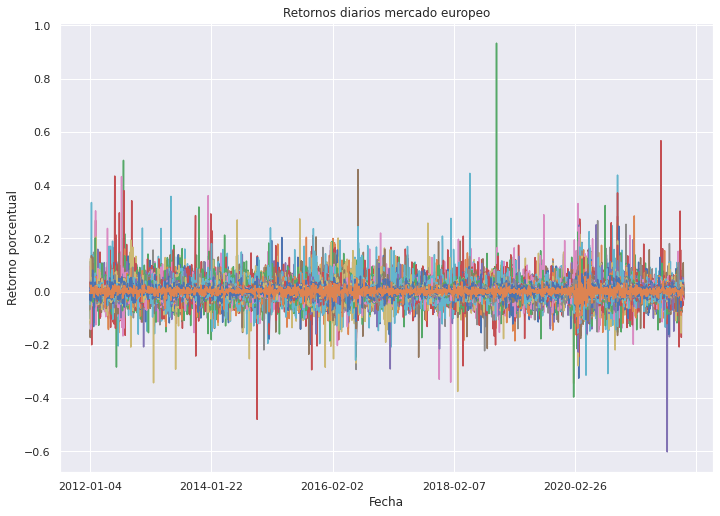

In [19]:
ax = european_returns.plot(legend = False, title ="Retornos diarios mercado europeo", ylabel="Retorno porcentual", xlabel="Fecha")

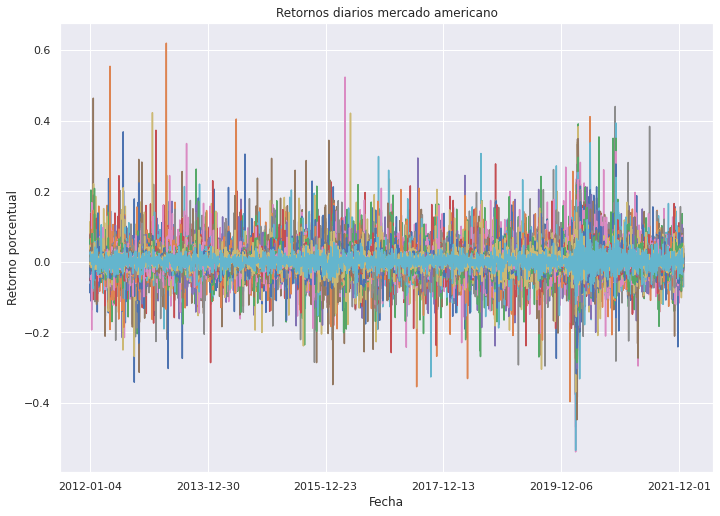

In [20]:
ax = american_returns.plot(legend = False, title ="Retornos diarios mercado americano", ylabel="Retorno porcentual", xlabel ="Fecha")

## Shapiro Wilk Test

In [153]:
shapiro(rs.dropna())[1]

3.6433760072445244e-44

In [155]:
shapiro(rsa.dropna())[1]

8.407790785948902e-45

In [21]:
shapiro_american = []
for item in american_returns:
    shapiro_american.append(shapiro(american_returns[item])[1])

In [167]:
(pd.Series(shapiro_american) > 0.05).sum()

0

<AxesSubplot:>

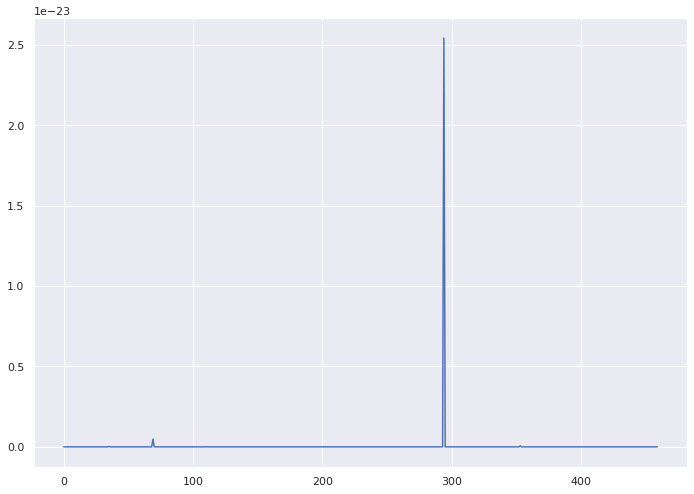

In [22]:
 pd.Series(shapiro_american)

In [32]:
shapiro_european = []
for item in european_returns:
    shapiro_european.append(shapiro(european_returns[item])[1])

In [169]:
(pd.Series(shapiro_european) > 0.05).sum()

0

<ipython-input-54-aba9cff31f56>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


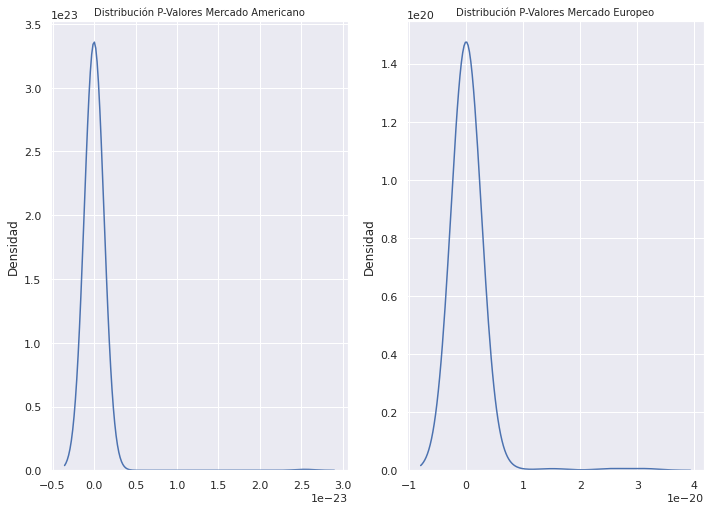

In [54]:
fig, ax =plt.subplots(1,2)
ax1= sns.kdeplot(pd.Series(shapiro_american), bw_method=1, fill=False, alpha = 1, ax = ax[0] )
ax2 = sns.kdeplot(pd.Series(shapiro_european), bw_method=1, fill=False, alpha = 1, ax = ax[1] )

ax1.set_ylabel("Densidad")
ax2.set_ylabel("Densidad")
ax1.set_title("Distribución P-Valores Mercado Americano", fontsize=10)
ax2.set_title("Distribución P-Valores Mercado Europeo", fontsize=10)
fig.show()


## Augmented Dicky Fuller Test (Testing stationarity)

In [55]:
dickys_americano = []
for item in american_returns:
    dickys_americano.append(adfuller(american_returns[item], regression = "n", maxlag = 10)[1])

In [57]:
pd.Series(dickys_americano).sort_values()

332    0.000000e+00
119    0.000000e+00
292    0.000000e+00
117    0.000000e+00
116    0.000000e+00
           ...     
241    1.362319e-24
283    1.677059e-24
253    1.991604e-24
366    2.580892e-24
91     4.192056e-24
Length: 460, dtype: float64

In [58]:
(pd.Series(dickys_americano) > 0.05).sum()

0

In [60]:
dickys_europe = []
for item in european_returns:
    dickys_europe.append(adfuller(x = european_returns[item], regression="n", maxlag = 10)[1])

In [61]:
pd.Series(dickys_europe).sort_values()

0      0.000000e+00
165    0.000000e+00
166    0.000000e+00
168    0.000000e+00
169    0.000000e+00
           ...     
193    1.668725e-25
8      1.927139e-25
128    2.811647e-25
149    2.862097e-25
133    2.742026e-24
Length: 272, dtype: float64

In [132]:
rs = indexes_close["^GSPC"].apply(np.log).diff(1) 

<AxesSubplot:xlabel='Date'>

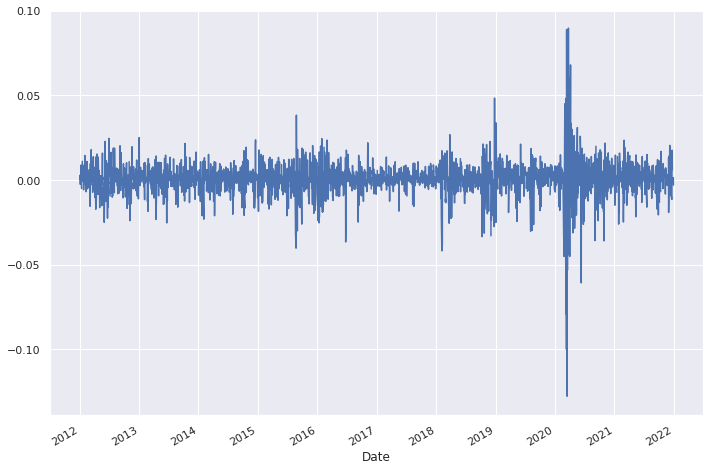

In [134]:
rs.plot()

In [135]:
rsa = indexes_close["^GSPC"].pct_change(periods = 1)

<AxesSubplot:xlabel='Date'>

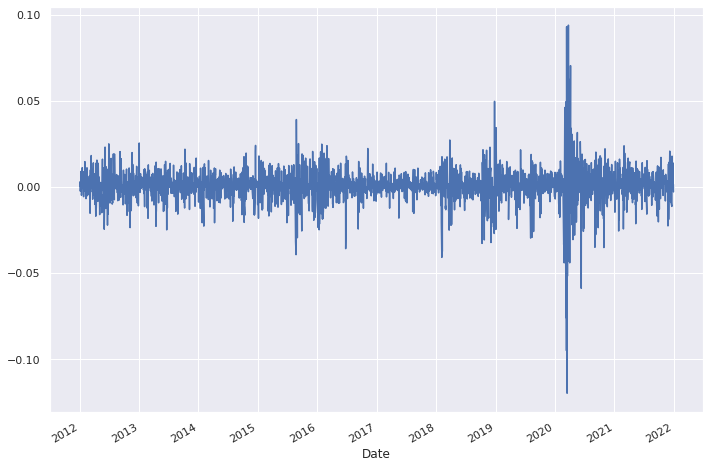

In [136]:
rsa.plot()

<ipython-input-62-c0a2218b9923>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


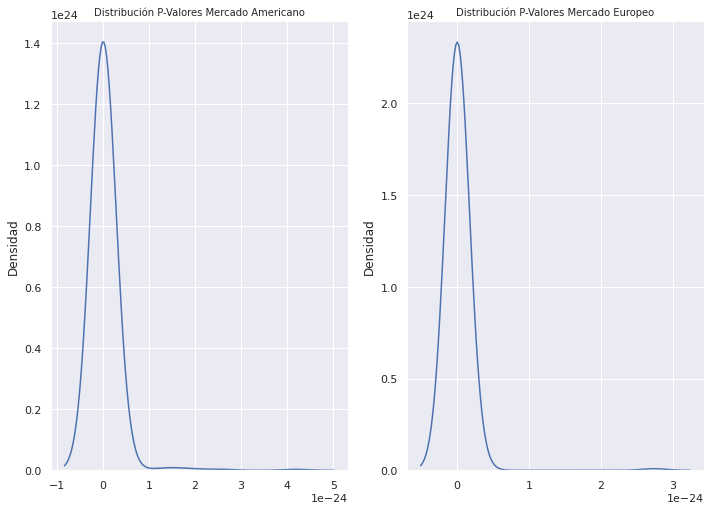

In [62]:
fig, ax =plt.subplots(1,2)
ax1= sns.kdeplot(pd.Series(dickys_americano), bw_method=1, fill=False, alpha = 1, ax = ax[0] )
ax2 = sns.kdeplot(pd.Series(dickys_europe), bw_method=1, fill=False, alpha = 1, ax = ax[1] )

ax1.set_ylabel("Densidad")
ax2.set_ylabel("Densidad")
ax1.set_title("Distribución P-Valores Mercado Americano", fontsize=10)
ax2.set_title("Distribución P-Valores Mercado Europeo", fontsize=10)
fig.show()


## Análisis de factores principales

<AxesSubplot:title={'center':'Primer Componente del PCA de Mercado Europeo'}>

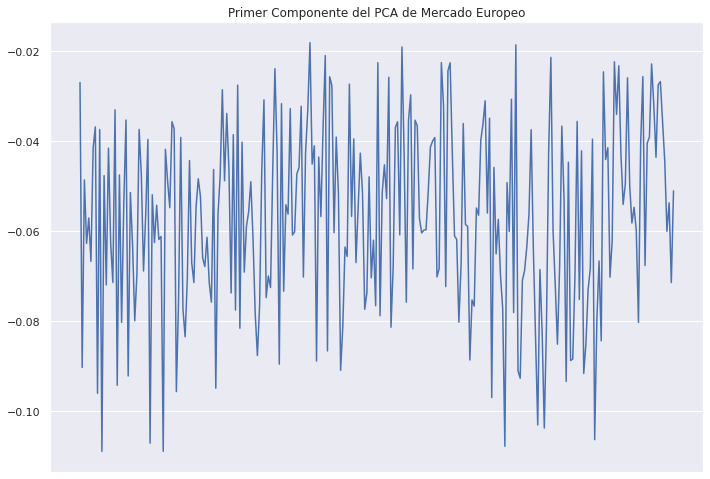

In [63]:
pca = PCA(1).fit(european_returns)
pc1 = pd.Series(index=european_returns.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='Primer Componente del PCA de Mercado Europeo')

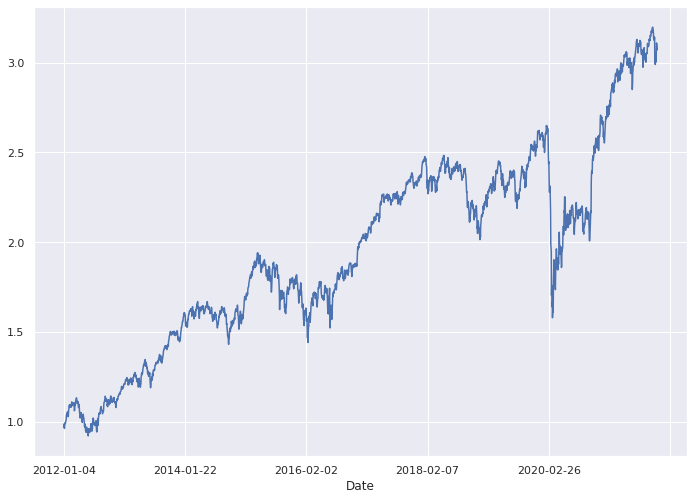

In [65]:
weights_europe = abs(pc1)/sum(abs(pc1))
myrs_europe = (weights_europe*european_returns).sum(1)
ax = myrs_europe.cumsum().apply(np.exp).plot()

<AxesSubplot:title={'center':'Primer Componente del PCA de Mercado Americando'}>

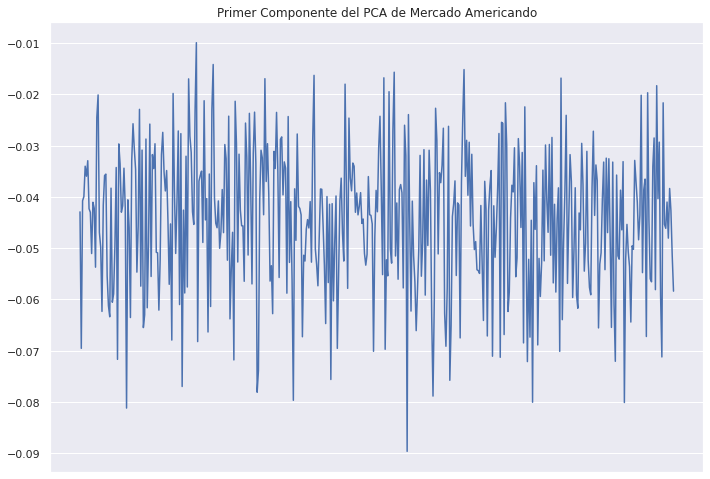

In [66]:
pca = PCA(1).fit(american_returns)
pc1 = pd.Series(index=american_returns.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='Primer Componente del PCA de Mercado Americando')

<AxesSubplot:xlabel='Date'>

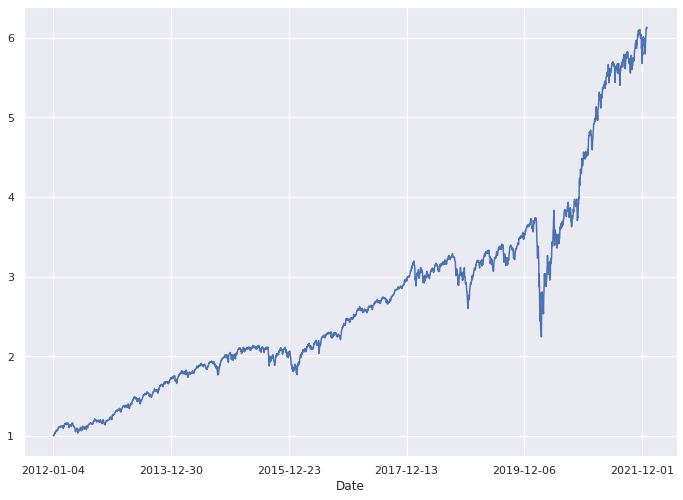

In [67]:
weights_american = abs(pc1)/sum(abs(pc1))
myrs_american = (weights_american*american_returns).sum(1)
myrs_american.cumsum().apply(np.exp).plot()

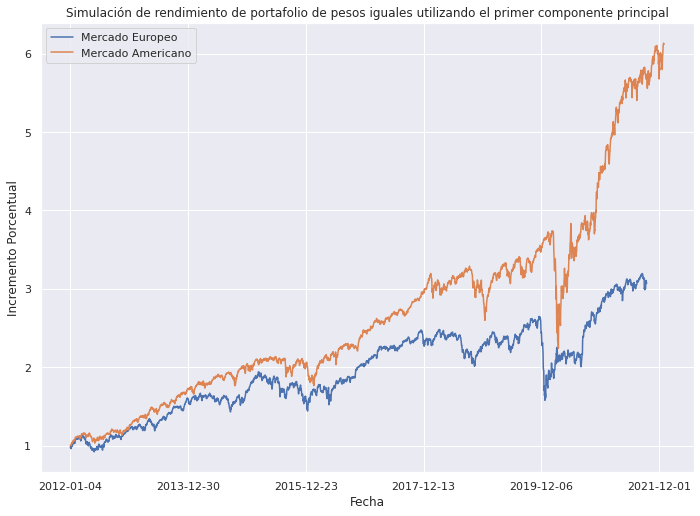

In [71]:
ax = myrs_europe.cumsum().apply(np.exp).plot()
ax = myrs_american.cumsum().apply(np.exp).plot()
plt.title("Simulación de rendimiento de portafolio de pesos iguales utilizando el primer componente principal")
ax.set_xlabel("Fecha")
ax.set_ylabel("Incremento Porcentual")
plt.legend(["Mercado Europeo", "Mercado Americano"])

mencionar desfase

## Análisis de medias y SD

In [174]:
medias_am = american_returns.mean()
medias_eu = european_returns.mean()

In [182]:
medias =pd.DataFrame(data ={"Mercado Americano": medias_am, "Mercado Europeo": medias_eu})

Text(0.5, 1.0, 'Medias de Retornos de los Componentes de cada Mercado')

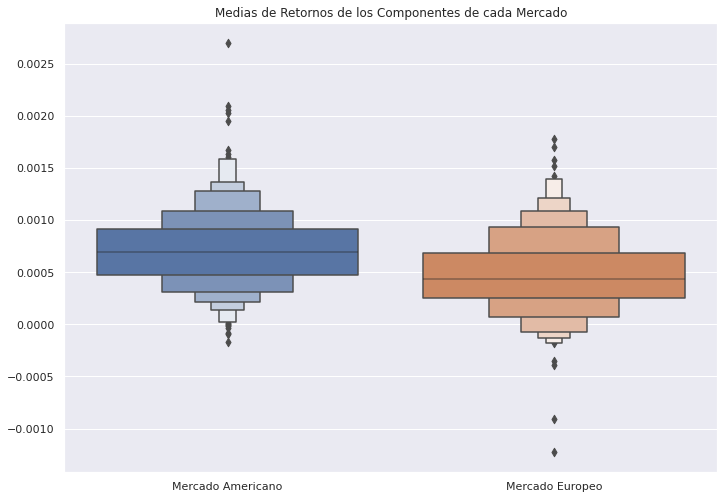

In [185]:
ax = sns.boxenplot(data = medias)
plt.title("Medias de Retornos de los Componentes de cada Mercado")

In [187]:
std_am = american_returns.std()
std_eu = european_returns.std()

In [188]:
stds =pd.DataFrame(data ={"Mercado Americano": std_am, "Mercado Europeo": std_eu})

Text(0.5, 1.0, 'Desviaciones Estándar de Retornos de los Componentes de cada Mercado')

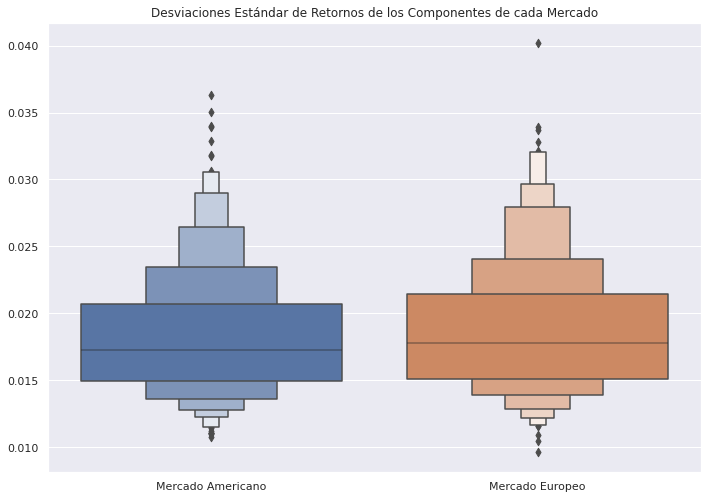

In [189]:
ax = sns.boxenplot(data = stds)
plt.title("Desviaciones Estándar de Retornos de los Componentes de cada Mercado")